In [1]:
!pip install tensorflow matplotlib pandas


In [2]:
# Import libraries
import os
import tensorflow as tf
from tensorflow.keras.applications import (
    ResNet50, MobileNetV2, VGG16, InceptionV3
)
from tensorflow.keras.applications import EfficientNetV2B0 as VisionTransformer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd

# Define constants
DATASET_DIR = "/content/sample_data"  # Change this to your dataset folder name
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Data loading and preprocessing
datagen = ImageDataGenerator(validation_split=0.2, rescale=1.0 / 255)

train_data = datagen.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset="validation"
)


Found 64 images belonging to 4 classes.
Found 15 images belonging to 4 classes.


In [3]:
# Define a function to build and train models
def train_model(base_model_fn, name):
    print(f"\nTraining {name} model...")
    # Load base model
    base_model = base_model_fn(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3))
    base_model.trainable = False  # Freeze pre-trained layers

    # Build custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(len(train_data.class_indices), activation="softmax"),
    ])

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Train model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=EPOCHS,
        verbose=1,
    )
    return history, model

# Train models
models_to_train = {
    "ViT": VisionTransformer,
    "ResNet50": ResNet50,
    "MobileNetV2": MobileNetV2,
    "VGG16": VGG16,
    "InceptionV3": InceptionV3,
}

histories = {}
trained_models = {}

for name, base_model_fn in models_to_train.items():
    history, model = train_model(base_model_fn, name)
    histories[name] = history
    trained_models[name] = model



Training ViT model...
24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.1354 - loss: 1.4374 - val_accuracy: 0.3333 - val_loss: 1.1397
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2917 - loss: 1.2291 - val_accuracy: 0.3333 - val_loss: 1.1401
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3958 - loss: 1.2116 - val_accuracy: 0.3333 - val_loss: 1.1232
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3646 - loss: 1.2168 - val_accuracy: 0.3333 - val_loss: 1.1047
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.2604 - loss: 1.2856 - val_accuracy: 0.3333 - val_loss: 1.1098
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3750 - loss: 1.1986 - val_accuracy: 0.3333 - val_loss: 1.1163
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.3646 - loss: 1.1925 - val_accuracy: 0.3333 - val_loss: 1.1059
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.2708 - loss: 1.2240 - val_accuracy: 0.3333 - val_loss: 1.1068
Epoch 9/10
2/2 ━━━━━━━━━━━

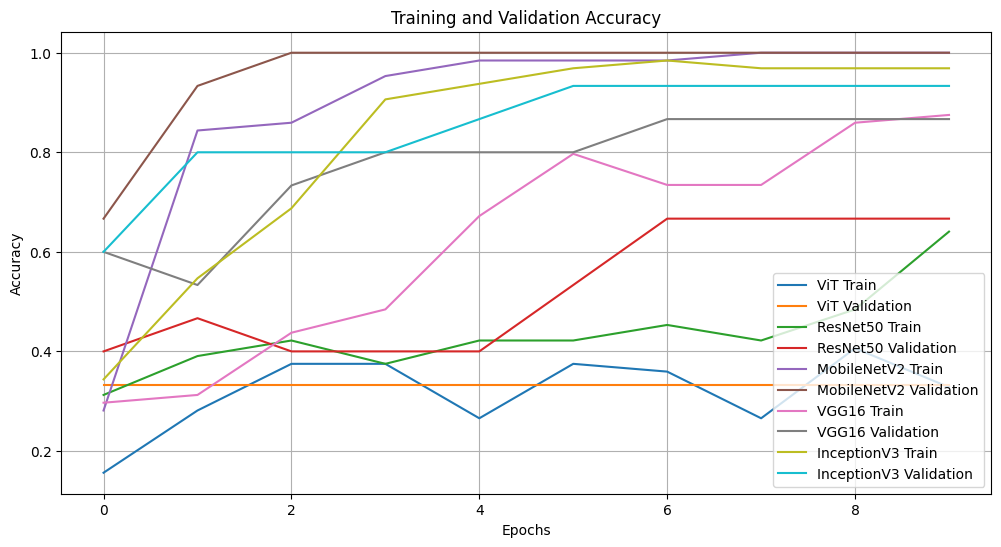

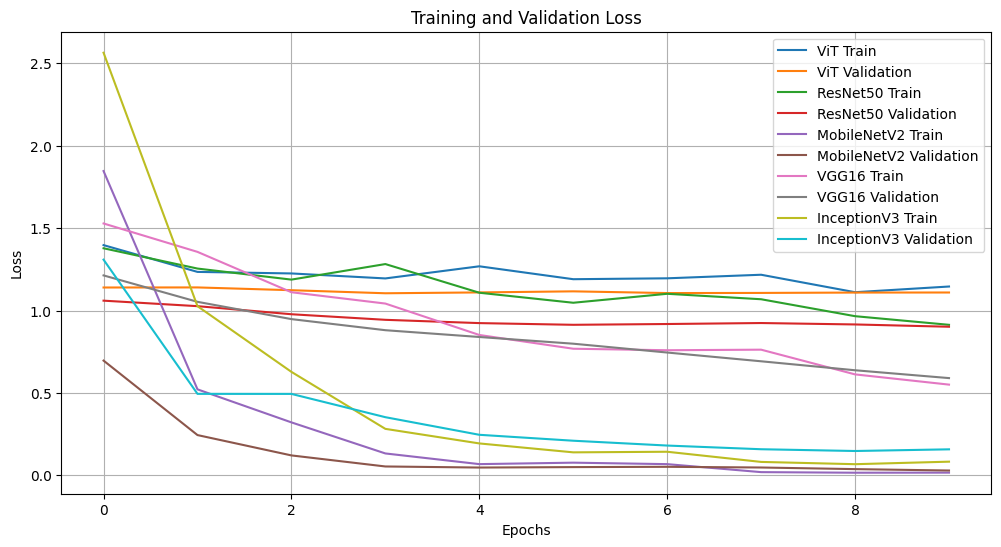

In [4]:
# Plot training and validation accuracy and loss
def plot_metrics(histories, metric="accuracy"):
    plt.figure(figsize=(12, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f"{name} Train")
        plt.plot(history.history[f"val_{metric}"], label=f"{name} Validation")
    plt.title(f"Training and Validation {metric.capitalize()}")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()
    plt.show()

plot_metrics(histories, metric="accuracy")
plot_metrics(histories, metric="loss")


Evaluating ViT...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step - accuracy: 0.3333 - loss: 1.1093


Evaluating ResNet50...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.9016


Evaluating MobileNetV2...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 1.0000 - loss: 0.0292


Evaluating VGG16...
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8667 - loss: 0.5899


Evaluating InceptionV3...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9333 - loss: 0.1578


         Model  Accuracy      Loss
0          ViT  0.333333  1.109326
1     ResNet50  0.666667  0.901570
2  MobileNetV2  1.000000  0.029190
3        VGG16  0.866667  0.589949
4  InceptionV3  0.933333  0.157754


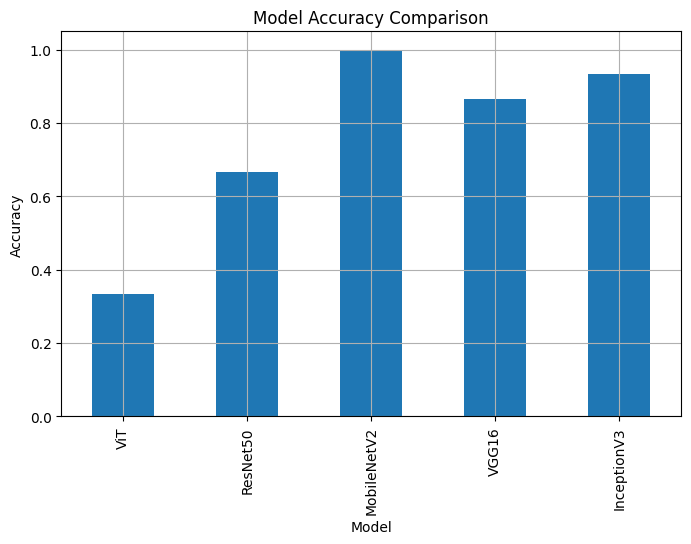

In [5]:
# Save models and evaluate final accuracy
results = []

for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    loss, acc = model.evaluate(val_data)
    results.append({"Model": name, "Accuracy": acc, "Loss": loss})
    model.save(f"{name}_model.h5")

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Plot final comparison of accuracies
results_df.set_index("Model", inplace=True)
results_df["Accuracy"].plot(kind="bar", figsize=(8, 5), title="Model Accuracy Comparison", grid=True)
plt.ylabel("Accuracy")
plt.show()


In [6]:
def train_vit_model():
    print("\nFine-tuning Vision Transformer (ViT)...")
    base_model = VisionTransformer(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3))
    base_model.trainable = True  # Unfreeze layers for fine-tuning

    # Build custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(len(train_data.class_indices), activation="softmax"),
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Lower learning rate for fine-tuning
                  loss="categorical_crossentropy", metrics=["accuracy"])

    # Train model
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=EPOCHS + 5,  # Train for additional epochs
        verbose=1,
    )
    return history, model

# Train Vision Transformer
vit_history, vit_model = train_vit_model()



Fine-tuning Vision Transformer (ViT)...
Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 75s 12s/step - accuracy: 0.2500 - loss: 1.4172 - val_accuracy: 0.3333 - val_loss: 1.3420
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step - accuracy: 0.4167 - loss: 1.2364 - val_accuracy: 0.3333 - val_loss: 1.3689
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.6042 - loss: 1.0784 - val_accuracy: 0.3333 - val_loss: 1.3891
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.7292 - loss: 0.9155 - val_accuracy: 0.3333 - val_loss: 1.3920
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.9375 - loss: 0.8061 - val_accuracy: 0.3333 - val_loss: 1.3893
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.8958 - loss: 0.7455 - val_accuracy: 0.3333 - val_loss: 1.3869
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.9583 - loss: 0.6434 - val_accuracy: 0.3333 - val_loss: 1.3734
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.9479 - loss: 0.6140 - val_ac

In [7]:
datagen_vit = ImageDataGenerator(
    validation_split=0.2,
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_data_vit = datagen_vit.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset="training"
)

val_data_vit = datagen_vit.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset="validation"
)


Found 64 images belonging to 4 classes.
Found 15 images belonging to 4 classes.


In [8]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * (0.1 ** (epoch // 10))
)

vit_history, vit_model = train_vit_model()



Fine-tuning Vision Transformer (ViT)...
Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 71s 12s/step - accuracy: 0.2083 - loss: 1.4606 - val_accuracy: 0.3333 - val_loss: 1.3915
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.4896 - loss: 1.2489 - val_accuracy: 0.3333 - val_loss: 1.3817
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.7292 - loss: 1.0808 - val_accuracy: 0.3333 - val_loss: 1.3796
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.8021 - loss: 0.9851 - val_accuracy: 0.3333 - val_loss: 1.3855
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.8333 - loss: 0.8726 - val_accuracy: 0.3333 - val_loss: 1.3938
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.9479 - loss: 0.7224 - val_accuracy: 0.3333 - val_loss: 1.3938
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.9479 - loss: 0.6606 - val_accuracy: 0.3333 - val_loss: 1.4018
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.9792 - loss: 0.5595 - val_ac

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the base model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),  # Adjust as per your input data shape
    include_top=False,          # Exclude the top classification layer
    weights='imagenet'          # Use pre-trained weights from ImageNet
)

# Freeze the base model
base_model.trainable = False

# Add your custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(len(train_data.class_indices), activation="softmax"),
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,586,948 (9.87 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
EPOCHS_VIT = EPOCHS + 10  # Increase the number of epochs
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS_VIT,
    verbose=1,
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3958 - loss: 6.1341 - val_accuracy: 0.8667 - val_loss: 4.5043
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.9167 - loss: 4.4822 - val_accuracy: 1.0000 - val_loss: 4.1818
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 4.1635 - val_accuracy: 1.0000 - val_loss: 4.0422
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9688 - loss: 4.0567 - val_accuracy: 1.0000 - val_loss: 3.9276
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 1.0000 - loss: 3.9231 - val_accuracy: 1.0000 - val_loss: 3.8115
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 1.0000 - loss: 3.7929 - val_accuracy: 1.0000 - val_loss: 3.6938
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 3.6716 - val_accuracy: 1.0000 - val_loss: 3.5744
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 1.0000 - loss: 3.5496 - val_accuracy: 1.0000 - val_loss: 3.4532
Epoch 9/20
2/2 

In [12]:
BATCH_SIZE = 64  # Increase batch size
train_data = datagen.flow_from_directory(
    DATASET_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset="training"
)


Found 64 images belonging to 4 classes.



Training ResNet50 model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.1875 - loss: 2.1345 - val_accuracy: 0.3333 - val_loss: 1.2685
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.3438 - loss: 1.5005 - val_accuracy: 0.6667 - val_loss: 1.0773
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.2969 - loss: 1.3265 - val_accuracy: 0.4000 - val_loss: 1.0444
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.3594 - loss: 1.4120 - val_accuracy: 0.4667 - val_loss: 1.0127
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3906 - loss: 1.2647 - val_accuracy: 0.6000 - val_loss: 0.9598
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.4062 - loss: 1.2518 - val_accuracy: 0.4000 - val_loss: 0.9534
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.4531 - loss: 1.1028 - val_accuracy: 0.3333 - val_loss: 0.9644
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.4531 - loss: 1.1041 - val_accuracy: 0.3333 - val_loss: 0.9570
Epoch 9/10


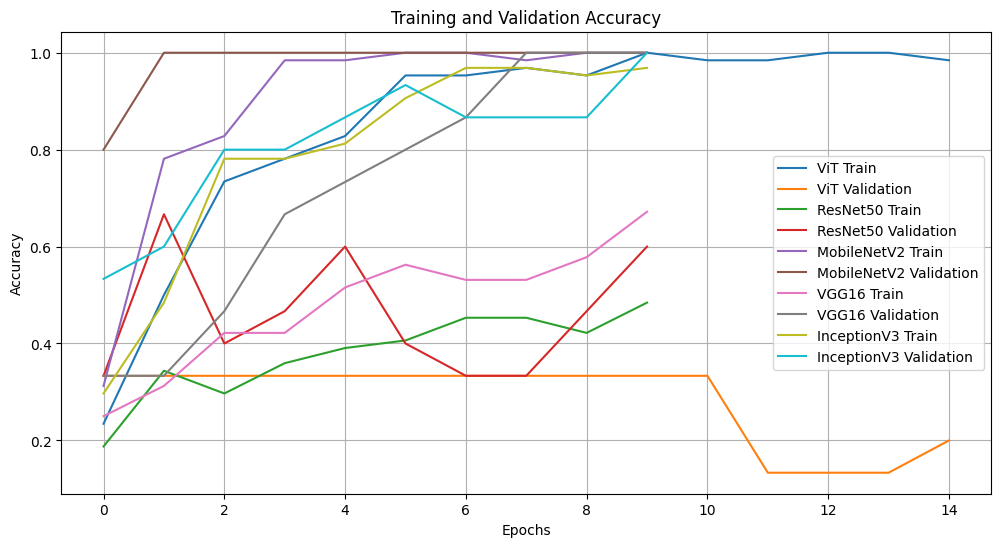

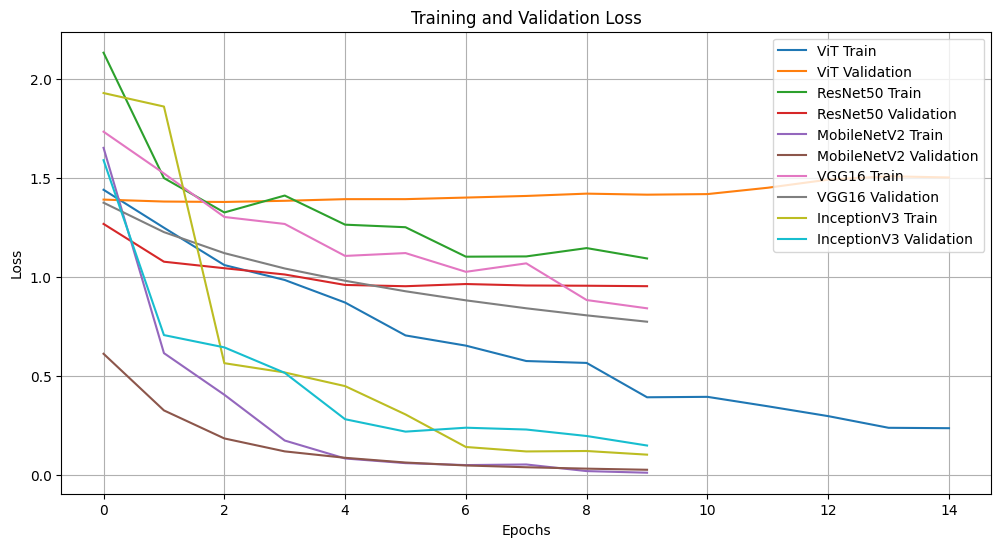

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step - accuracy: 0.2000 - loss: 1.5035


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.9535


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - accuracy: 1.0000 - loss: 0.0249


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.7738


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.1476


         Model  Accuracy      Loss
0          ViT       0.2  1.503548
1     ResNet50       0.6  0.953550
2  MobileNetV2       1.0  0.024909
3        VGG16       1.0  0.773837
4  InceptionV3       1.0  0.147568


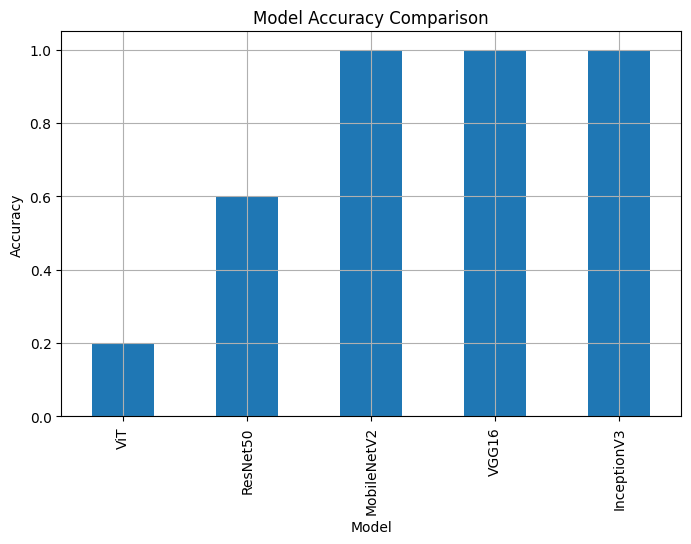

In [13]:
# Train other models
for name, base_model_fn in models_to_train.items():
    if name != "ViT":
        history, model = train_model(base_model_fn, name)
        histories[name] = history
        trained_models[name] = model

# Save and plot metrics
trained_models["ViT"] = vit_model
histories["ViT"] = vit_history

plot_metrics(histories, metric="accuracy")
plot_metrics(histories, metric="loss")

# Final evaluation
results = []
for name, model in trained_models.items():
    loss, acc = model.evaluate(val_data)
    results.append({"Model": name, "Accuracy": acc, "Loss": loss})
    model.save(f"{name}_model.h5")

# Display and plot comparison
results_df = pd.DataFrame(results)
print(results_df)
results_df.set_index("Model", inplace=True)
results_df["Accuracy"].plot(kind="bar", figsize=(8, 5), title="Model Accuracy Comparison", grid=True)
plt.ylabel("Accuracy")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step - accuracy: 0.4000 - loss: 1.4297

Updated Results:
            Model  Accuracy      Loss
0             ViT       0.2  1.503548
1        ResNet50       0.6  0.953550
2     MobileNetV2       1.0  0.024909
3           VGG16       1.0  0.773837
4     InceptionV3       1.0  0.147568
5  ViT (Improved)       0.4  1.429697


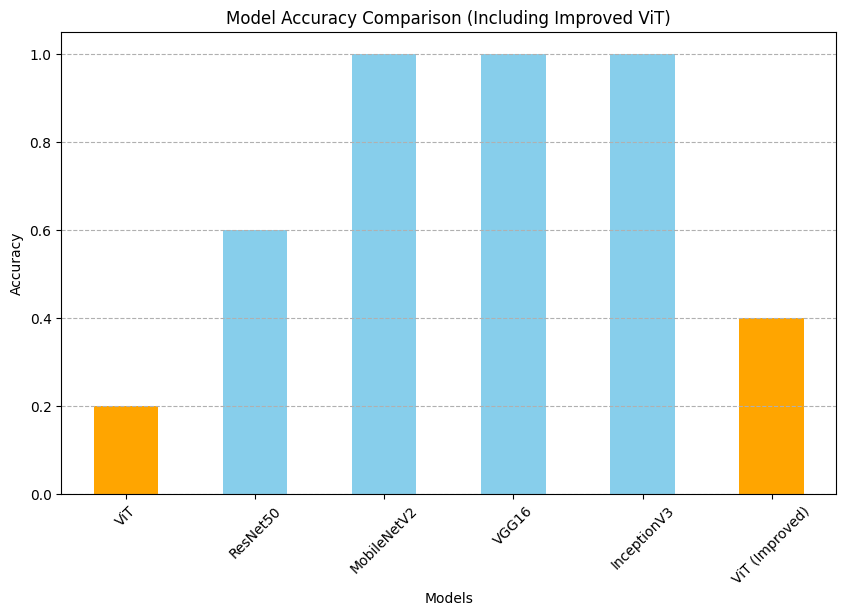

In [14]:
# Update the results with the new ViT accuracy and loss
vit_loss, vit_acc = vit_model.evaluate(val_data_vit)
results.append({"Model": "ViT (Improved)", "Accuracy": vit_acc, "Loss": vit_loss})

# Add new ViT results to the DataFrame
results_df = pd.DataFrame(results)
print("\nUpdated Results:")
print(results_df)

# Plot updated comparison of accuracies
plt.figure(figsize=(10, 6))
results_df.set_index("Model", inplace=True)
results_df["Accuracy"].plot(kind="bar", color=["skyblue" if "ViT" not in model else "orange" for model in results_df.index])
plt.title("Model Accuracy Comparison (Including Improved ViT)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.grid(axis="y", linestyle="--")
plt.xticks(rotation=45)
plt.show()
